**什么是数据挖掘**
<p>    *数据挖掘实在大型数据库中，自动发现有用信息的过程。数据挖掘技术用来探查大型数据库，发现先前未知的有用模式。
      *
</p>
**数据挖掘要解决的问题**
<p>
新数据集带来的问题时，传统的数据分析技术常常遇到时间困难。
   <ol>
       <li>**可伸缩性**  *数据产生和收集技术的进步，形成海量数据，那么算法就必须是可伸缩的，以支持不同的搜索策略。例如当处理的数据不能放入内存时，可能需要非内存的算法。*</li>
       <li>**高纬性** *程程遇到具有成百上千的属性的数据集，而不是以前常见的只有少量属性的数据集。在生物、天气、具有时间或空间分量的数据集都会有高维。传统的低纬数据分析通常不能处理高维数据集，此外对于这些算法，随着维度的增加，计算复杂性也迅速增加*</li>
       <li>**异种数据和复杂数据** *传统的数据分析只处理包含形同类型的属性的数据集，或者是连续的，在或者是分类的。现在的数据结构对象已经非常复杂，为挖掘这些复杂对象而开发的技术应当考虑数据中的联系。如：时间和空间的自行相关，图的连通性、半结构化的文本和XML文档中父子间的联系*</li>
       <li>**非传统的分析** *传统的统计方法基于一种“假设—检验模式”，即提出一种假设，设计实验来收集数据，然后针对假设分析数据。但是这一过程劳力费神。当前的分析任务常常需要产生和评估数据千中假设，因此需要自动的产生和评估假设。这就催生新技术的产生。数据挖掘分析的数据集通常不是机芯设计的实验的结果。并且他们通常代表数据的时机性样本，而非随机样本，这些数据通常还设计非传统的数据类型或数据分布*</li>
   </ol>
</p>
**数据挖掘任务**
   <ol>
       <li>**预测任务** *这些任务的目标是根据其他属性的值，预测特定的属性的值。别预测的属性值称“因变量”，而用来预测的属性值称“自变量”*</li>
       <li>**描述任务** *其目标是导出概括数据中潜在的联系的模式（相关、趋势、聚类、轨迹和异常）*</li>
   </ol>
   <ul>
    <li>**关联分析** *用来发现描述数据中强关联特征模式。所发现的模式常蕴含着规则或者特征子集的形式表示。由于搜索空间是指数规模的，关联分析的目标是以有效的方式提取最有趣的模式。关联分析的应用一般包括，相关功能的基因组，识别用户一期访问的WEB页面等。应用实例如下图*<img src="img/guan_lian_fen_xi.jpg"></li>
    <li>**聚类分析** *发现紧密关系的观测值组群，使得与属于不同簇的观测值相比，数据同一簇的观测值相互间能可能类似。聚类可以用来对相关顾客分组，找出显著性影响。应用实例如下图*<img src="img/ju_lei_fen_xi.jpg"></li>
    <li>**异常检测** *识别其特征不同于其他数据的观测值，这样的观测值成为“异常点”或者是“离群点”。异常检测算法的目标是发现真正的异常点，而避免错误的将正确的对象标注为异常点。一个好的异常检测器必须具有高检测率和低误报率。异常检测的应用包括检测欺诈软件、网络攻击、疾病的不寻常模式，生态系统扰动等。应用实例，信用卡公司记录每个持卡人所做的交易，同时也会记录信用卡的信用额度、年龄、年薪和地址等个人信息。由于合法交易额相较于欺诈一般较少，因此该交易的特性与先前所构造的轮廓很不相同时，就把交易标记为可能是欺诈*</li>
   </ul>
  <ul>
    <li>
       **数据类型** 通常数据集可以看坐是数据对象的集合。数据对象有时也叫做”记录、点、向量、模式、事件、案例、样本、观测、实体“，数据对象用一组刻画对象的基本特性的属性描述。如：变量、特性、字段、特征、维。
         <p>
       **属性与度量** 1、属性，对象的性质或者是特征，它引对象而异，随时间变化。2、测量标度，将数值货符号值与对象的属性相关联的规则即函数。3、属性的不同类型 ，根据属性值个数表述，可分为”离散的，连续的“。4、非对称的属性，出现非零属性值才是重要的。有这样的一个数据集，其中每个对象是学生，而每个属性是记录学生是否选修大学课程。对于某个学生如果他选修了对应某个属性的课程取值 1 否则取值 0  .由于学生只选修所有课选修的课程中的一小部分，这种数据集大部分是 0.因此关注非零值将更有意义、更有效。否则如果在学生不选修的课程上比较，则大部分学生都非常相似。
       </p>
    </li>
</ul>
<p>
	数据集的一般特性
   <ol>
        <li>维度：	数据集的维度是数据集中对象具有的属性条目。低纬度数据往往与中、高维度数据有质的不同。分析高纬度数据集会陷入为灾难。
				正是因为如此，数据预处理的一个重要动机就是减少维数，称为“维规约”。
        </li>
        <li>稀疏性：有些数据集，具有非对称特征的数据集，一个对象大部分属性伤的值为零，在许多情况下非零项不到1%。实际上，稀疏性是一
				个有点，因为只有非零值才需要存储，这将大量节省空间，此外有些数据挖掘算法仅适合处理稀疏数据。
        </li>
        <li>分辨率：常常可以在不同的分辨率下的到数据，并且在不同分辨率下得到数据性质不同，例如，在几米的分辨率下地球表面很不平坦，但是数十公里的分辨率下却相对平淡。
        </li>
  </ol>
</p>
<p>
	**数据集的类型**
     <br></br>
		记录数据，许多数据挖掘任务都是假设数据集是记录的汇集，每个记录包含固定的数据字段。
     <ol>
        <li>
		事物数据或购物篮数据：事务数据，是一种特殊类型的记录数据，其中每个记录涉及一系列的项。如：一个杂货店。顾客一次购物所购
		买的商品的集合就构成一个事务，而购买的商品是“项”。这种类型的数据称“购物篮数据”，事务数据是项的集合的集族，但是也能将它
		视为记录集合，其中记录的字段是非对称的属性。这些属性常常是二元的，指出商品是否已买，也可以是离散的或者是连续的，
        </li>
        <li>
		矩阵数据，如果一个数据集族中所有数据对象都具有相同的数据值属性，则数据对象可以看作是多维空间中的点（向量），其中每个维
		代表对象的一个不同属性。这样的数据对象集可以用一个 m * n 的矩阵表示。
         </li>
       <li>
		稀疏数据矩阵，稀疏数据矩阵是数据矩阵的一种特殊情况，其中属性的类型相同并且是非对称的，即只有非零值才重
       </li>
     </ol>
		基于图形的数据，图形可以方便而有效的表示数据。<br>
		有序数据，对于有些数据属性涉及时间空间的联系。<br>
		1、时序数据，时序数据也称“时间数据”，可以看作记录数据的扩充，其中每个记录包含一个与之相关联的时间。考虑存储事务发生时间的零售事务<br>
		数据。时间信息可以帮助我们发现“万圣节前夕糖果销售到达高峰”之类的模式。时间也可以与每个属性信息相关联。例如，每个记录可以是一位顾客<br>
		的购物历史，包含不同时间购买的商量列表，使用这些信息，就有发现“购买apple watch 的之后很快买了apple”之类的模式<br>
		2、序列数据 序列数据是一个数据集合，它是各个实体的序列，如词或者字母的序列，除没有时间戳外，它跟时序数据非常相似，只是有序序列。例如<br>
	数据预处理<br>
		1、聚集，就是将两个或者两个以上的对象合并成单个对象，如：事务数据<br>
		2、抽样，是一种选择数据对象子集常用的方法降低费用和时间。<br>
		3、维归约，如果维度较低，许多挖掘算法效果会更好，避免维灾难，因为随着维度的增加许多数据分析变得非常困难，对于很多分类聚类算法据准率降低。<br>
		维归约的一些常用方法是使用线性代数技术，将高维数据投射到低维空间。<br>
		4、特征子集的选择，<br>
		5、特征创建，有原来属性创建新的属性  如:原始数据映射到新的空间上，有傅里叶变换<br>
		6、特征构造，原始数据的特征都是必要的，但不适合挖掘，需要原始数据的一个或者多个属性构造出新的属性 密度 = 质量/体积<br>
</p>
**简单函数变量变换**
<ul>
    <li>
        改变换，是使用一个简单的数据函数分别作用于每个值，如果x是变量这种变换的例子包括 $x^k 、e^x 、\sqrt{x} 、\frac{1}{x}、\sin x 、vert x 、log x$ 。在统计学中变量变换（特别是平方根和倒数）常用来经不具备高斯分布的变换成高斯分布。使用变量变换时需要小心：因为这样操作改变了数据的特性。尽管有时候需要这么做，但是如果在没有深入理解被转换的特性，则可能出现问题。例如：变换$\frac{1}{x}$虽然压缩了大于1的值，但是却放大了 [0,1]之间的值，如果{1,2,3}变为{$1、\frac{1}{2}、\frac{1}{3}$ }一个转变，数据的顺序就逆转了，这时候就要问，我们分析的问题是否需要保序
    </li>
</ul>    
**规范化或标准化**
<ul>
    <li>
        变量变换是变量的标准化或者是规范化，规范化或者标准化的目标是整个值得集合具有特定的性质。一个传统的例子就是统计学中“对变量标准化”。如果 $\overline{x}$是属性的平均值，而$s_x$是他们的标准差，则$ x' = \frac{x-\overline{x}}{s_x}$,它具有均值为0 标准差为1。如果要以某种方法组合不同的变量，为了避免较大值域变量左右计算结果，这种变化就是必须的。
    </li>
</ul>

**k-近邻算法**
<p>
      k-近邻算法是分类数据中最简单有效的算法，它是基于实例学习的，使用算法时我们必须有接近实际数据的训练样本数据；k-近邻算法必须保存全部数据，如果训练数据集很大，必须使用大量的存储空间。此外由于必须对数据集中的每个数据计算距离，实际，使用时间可能非常耗时
</p><p>
    k-近邻算法的缺陷就是，它无法给出任何数据的基础结构信息，因此我们也无法知晓平均实例样本和典型实例样本具有什么特征
</p>

**欧式距离：(Euclidean distance)**

$$d(X,Y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$$
<ul>
    <li>对称性</li>
    <li>非负性</li>
    <li>三角不等式</li>
</ul>

**闵可夫斯基距离：（Minkowski distance）**
$$d(X,Y) = \left( \sum_{i=1}^n|x_i-y_i|^r \right)^{1/r} $$
*作为闵可夫斯基距离的推广得到 欧几里得距离*

**相似性与相异性度量**
<p>
    相似性和相异性是重要的概念，因为它在许多数据挖掘技术中被应用。他们使用来描述对象间的邻近程度，他们邻近度的度量函数有 相关（也称皮尔逊距离）、欧几里得距离、Jaccard 、余弦相似性度量。 前两者使用于像时间序列这样的稠密数据，后俩适用于文档这样的稀疏数据
   
<ul>
    <li>
       相似度定义两个对象的相似程度，值越高越相似、相异度定义两个对象的相异度，值越低越相似。他们通常为正值在区间[0,1]取值
    </li>
    <li>
       为了迎合框架，需要相似性和向异性间互转，或约定值域我们需要把元数据归一[0,1]内，更为重要的是做线性分析或者非线性分析的时候对对象实施降维，这个时候就需要数据归一（例如：年龄+收入的时候，年龄会被淹没）。通常邻近度度量被定义为区间[0,1]中的值。这样做是使用一种适当的尺度，由邻近度值标示两对象间的相似性或相异性。如果两对象间的相似度在[1,10] 之间变化，则我们可以使用 $s' = \frac{s-1}{9}$ 来映射到 [0,1]之间，其中 s 和 s' 是相似度的原始值和新值。来办来说映射相似度到区间[0,1] 有如下公式给出 $s' = \frac{(s-min_s)}{max_s-min_s}$其中 min_s 和max_s 分别是相似度的最小值和最大值。类似的具有有限值域的相异度也能用 $d' = \frac{(d-min_d)}{max_d-min_d}$ 映射到区间[0,1].<br>
    </li>
</ul>
  **数据对象间的相异度** *使用欧几里得距离*
  <p>
        非度量的相异度，集合差：基于集合论中定义的两个集合差的概念举例：设集合A和B
  </p>
  **数据对象间的相似度** *对于相似度，三角不等式通常不成立，对称和非负性成立。*
  <p>
    如果s(x,y)是数据点x,y之间的相似度。
     1、仅当x=y s(x,y)=1<br>
     2、对所有的x和y s(x,y)=s(y,x)<br>
     非对称相似性度量：
  </p>
<p>
**二元数据的相似性度量**<br>
    两个仅包含二元属性的相似性度量也称之为 “相似系数” 并且通常在 0和1之间取值，值1标示完全相似，值0表示一点也不相似。
    设有x和y两个对象，都有n个二元属性组成。两个对象的比较会生一个比较矩阵<br>
    $f_{00}$=x 取0并且y取0的属性个数 <br>
    $f_{01}$=x 取0并且y取1的属性个数 <br>
    $f_{10}$=x 取1并且y取0的属性个数 <br>
    $f_{11}$=x 取1并且y取1的属性个数 <br>
    由简单匹配系数 SMC 一种常用的相似性系数 $SMC = \frac{值匹配的属性个数}{属性个数}=\frac{f_{00}+f_{11}}{f_{01}+f_{00}+f_{11}+f_{10}}$<br>
    Jaccard系数，假定x,y两个对象，代表一个事务矩阵两行，如果每个非对称的二元属性对应于一个商店商品，0标示未被购买，1标示购买。由于顾客购买的商品远小于商店商品的类目，因而像SMC 这种简单匹配系数将会判断所有的事务都是相似的。这样尝尝用Jacard 系数来处理非对称二元属性的对象。<br>
    $$J= \frac{匹配的个数}{不涉及0-0匹配的属性个数}=\frac{f_{11}}{f_{11}+f_{01}+f_{10}}$$<br>
     x(1,0,0,0,0,0,0,0,0,0)<br>
     y(1,0,0,0,0,0,1,0,0,1)<br>
     $f_{00}$=7 取0并且y取0的属性个数 <br>
     $f_{01}$=2 取0并且y取1的属性个数 <br>
     $f_{10}$=1 取1并且y取0的属性个数 <br>
     $f_{11}$=0 取1并且y取1的属性个数 <br>
     $$SMC =\frac{f_{00}+f_{11}}{f_{01}+f_{00}+f_{11}+f_{10}}=\frac{0+7}{2+1+0+7}=0.7$$<br>
     $$J =\frac{f_{11}}{f_{01}+f_{11}+f_{10}}=\frac{7}{2+1+0}=0.0$$<br>
     这就是SMC 和 Jaccard 系数的差别
</p>
<p>
**余弦相似度量** *通常文档用向量标示，向量的每个属性代表一个特定的词在文档中出现的频率，实际情况比较复杂，要忽略常用词等各种词，尽管文档具有数以千计的词但是文档中关键词构造的向量非零值还是比较少的。这样以事务数据一样，相似不能依赖共享的0的个数，因此两个文档多半不含许多相同的词。从而如果统计 0-0匹配则大多数文档都与其他文档非常相似。因此文档的度量不仅要考虑Jaccard 度量忽略0-0匹配，还要必须处理非二元向量。*<br>
    $$cos(x,y) =\frac{x.y}{||x|| ||y||}$$<br>
     x(3,2,0,5,0,0,0,2,0,0)<br>
     y(1,0,0,0,0,0,0,1,0,2)<br>
     x.y=3*1 +2*0 +0*0 + 5*0 +0*0 +0*0 +0*0 +2*1 + 0*0 +0*2 = 5<br>
     $$||x||=\sqrt{3*3+2*2+0*0 +5*5+0*0 +0*0 +0*0 +2*2+0*0 +0*0 +}=6.48$$
     $$||y||=\sqrt{1*1+0*0 +0*0 +0*0 +0*0 +0*0 +0*0 +1*1 +0*0 +2*2 +}= 2.45$$
     $$cos(x,y) =\frac{5}{6.48 * 2.45} = 0.31$$<br>
     $$cos(x,y) =\frac{x.y}{||x|| ||y||}=\frac{x}{||x||}*\frac{y}{||y||}$$<br>
     余弦相似度不需要考虑两个数据的量值，不过当量值重要的时候欧几里得距离就是一个更好的选择了
</p>
<p>
**广义Jaccard系数** *广义jaccard 系数也可以用于文档数据，并在二元属性下归约Jaccard系数。广义Jaccard系数又称 Tanimoto 系数*<br>
    $$EJ = \frac{x.y}{||x||^2+||y||^2 -x.y}$$
</p>
<p>
**相关性**  *两个具有二元变量或者连续变量的数据对象之间的相关性是对象属性之间线性关系的度量，更准去的说两个对象x和y之间的皮尔森相关系数有：*<br>
        $$总体样本：p_{xy} =\frac{ Cov = E\{[X-E(X)][Y-E(Y)]\}}{  \sqrt{D(X)}\sqrt{D(Y)}}$$
        $$抽样样本：p_{xy} =\frac{\frac{1}{n-1}\sum_{i=1}^n(x_i-\overline x)(y_i - \overline y)}{\sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\overline x)}*\sqrt{\frac{1}{n-1}\sum_{i=1}^n(y_i-\overline y)}}$$<br>
  相关度总是在[-1，1]之间取值。-1说明负完全相关 1说明正完全相关，从负相关到正相关图例：<img src="img/xiang_guan.jpg">
  还有很多相关算法 Bregman（布雷格曼）散度、Mahalanobis(马哈拉诺比斯)距离
  
</p>

In [12]:
'''
k-邻近算法
'''
#encoding:utf-8
import numpy as np
import matplotlib as plt
import operator 
import matplotlib.pyplot as plt
import pandas as pd
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [13]:
'''
KNN 算法核心
'''
def classify(inX,dataSet,labels,k):
    dataSetSize =dataSet.shape[0] # 数据的维度
    diffMat = np.tile(inX,(dataSetSize,1))-dataSet     # np.tile 复制一个矩阵  
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1) # sum 两向量间分量的距离平方和
    distances = np.sqrt(sqDistances)
    sortedDistancesIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteLabel = labels[sortedDistancesIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel,0)+1 #get(key,default) 
    sortedClassCount = sorted(classCount.iteritems(),
                              key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

    

In [14]:
group,labels = createDataSet()
#display(group)
#display(labels)
#classify([0,0],group,labels,3)
#np.zeros((3,2))
#data = pd.read_table('../Ch02/datingTestSet.txt',header=None,encoding='gb2312',delim_whitespace='\t',index_col=0)
#header=None:没有每列的column name，可以自己设定
#encoding='gb2312':其他编码中文显示错误
#delim_whitespace=True:用空格来分隔每行的数据
#index_col=0:设置第1列数据作为index
#np.ones(20)


In [15]:
def file2matrix(filename):
    fr = open(filename)
    #display(fr)
    arrayOfLines = fr.readlines()
    #display(arrayOfLines)
    numbersOfLlines = len(arrayOfLines)
    returnMat = np.zeros((numbersOfLlines,3)) #zeros(row,column)
    classLabelVector = [] 
    index = 0 
    for line in arrayOfLines:
        line = line.strip() # 去除两段的字符 如果味None 则去除两端的额空
        listFromLine = line.split('\t')
        #display(listFromLine[0:3])
        returnMat[index,:] = listFromLine[0:3] #这里写死是因为只有三个特征
        if listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        else:
            classLabelVector.append(1)
        index += 1
    return returnMat,classLabelVector

,飞行里程,玩游戏时间rate,每周消耗的冰淇淋（公升）,喜欢程度
0,40920.0,8.326976,0.953952,3.0
1,14488.0,7.153469,1.673904,2.0
2,26052.0,1.441871,0.805124,1.0
3,75136.0,13.147394,0.428964,1.0
4,38344.0,1.669788,0.134296,1.0
5,72993.0,10.141740,1.032955,1.0
6,35948.0,6.830792,1.213192,3.0
7,42666.0,13.276369,0.543880,3.0
8,67497.0,8.631577,0.749278,1.0
9,35483.0,12.273169,1.508053,3.0


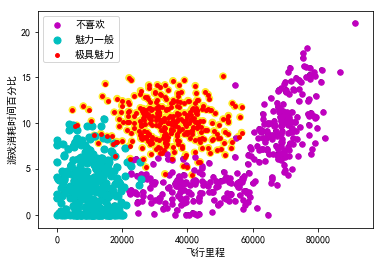

In [16]:
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt
import os
import os.path
'''
查看一下字体，解决中文乱码
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.08
fonts = [font.name for font in fontManager.ttflist if
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6]
font = set(fonts)
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0))
for font in fonts:
    t = ax.text(x, y, u"中文字体", {'fontname':font, 'fontsize':14}, transform=ax.transAxes)
    ax.text(x, y-dy/2, font, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()
'''
plt.rcParams["font.family"] = "SimHei"

'''
获取数据集，该数据集为一个约会网站数据集
'''
datingDataMat,datingLabels = file2matrix('../Ch02/datingTestSet.txt')
#display(datingLabels)
df = [np.append(datingDataMat[index],datingLabels[index]) for index in range(len(datingDataMat))]
#display(df)
testDf = pd.DataFrame(df,columns=["飞行里程","玩游戏时间rate","每周消耗的冰淇淋（公升）","喜欢程度"])
display(testDf.head(10))

'''
使用matplotlib 画图

解释，数据是三维数据，在没做惯性性分析的情况下去猜测相关度
第一次用飞行里程和玩游戏时间做作图

'''
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0],datingDataMat[:,1]
           ,15*np.array(datingLabels),15*np.array(datingLabels))
'''
ax.scatter(datingDataMat[:,0],datingDataMat[:,1]
           ,15*np.array(datingLabels),15*np.array(datingLabels),marker='x',label='C2')
'''
label = np.array(datingLabels);
idx_1 = np.where(label == 1)      #找label中为1的位置
p1 = plt.scatter(datingDataMat[idx_1,0], datingDataMat[idx_1,1]
                 , marker = 'o', color = 'm', label=U'不喜欢', s = 30)
idx_2 = np.where(label == 2)
p2 = plt.scatter(datingDataMat[idx_2,0],datingDataMat[idx_2,1],
                 marker='o',color='c',label=U'魅力一般',s=50)
idx_3 = np.where(label == 3)
p3 =  plt.scatter(datingDataMat[idx_3,0],datingDataMat[idx_3,1]
                 ,marker='o',color='r',label=U'极具魅力',s=15)

plt.ylabel(U"游戏消耗时间百分比")
plt.xlabel(U"飞行里程")
plt.legend(loc='upper left')
plt.show()

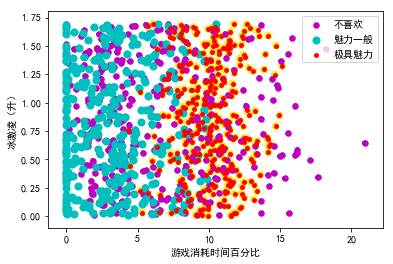

In [17]:
datingDataMat,datingLabels = file2matrix('../Ch02/datingTestSet.txt')
'''
使用matplotlib 画图

解释，数据是三维数据，在没做惯性性分析的情况下去猜测相关度
第二次用玩游戏时间和每周吃的冰淇淋做作图
'''
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2]
           ,15*np.array(datingLabels),15*np.array(datingLabels))
label = np.array(datingLabels);
idx_1 = np.where(label == 1)      #找label中为1的位置
p1 = plt.scatter(datingDataMat[idx_1,1], datingDataMat[idx_1,2]
                 , marker = 'o', color = 'm', label=U'不喜欢', s = 30)
idx_2 = np.where(label == 2)
p2 = plt.scatter(datingDataMat[idx_2,1],datingDataMat[idx_2,2],
                 marker='o',color='c',label=U'魅力一般',s=50)
idx_3 = np.where(label == 3)
p3 =  plt.scatter(datingDataMat[idx_3,1],datingDataMat[idx_3,2]
                 ,marker='o',color='r',label=U'极具魅力',s=15)

plt.ylabel(U"冰激凌（升）")
plt.xlabel(U"游戏消耗时间百分比")
plt.legend(loc='upper right')
plt.show()

In [23]:
#数据归一特征值  归一到 [0,1)
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals,(m,1))
    normDataSet = normDataSet/np.tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [38]:
# 测试function
def dataClassTest():
    hoRatio = 0.1
    datingDataMat,datingLabels = file2matrix("../Ch02/datingTestSet.txt")
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]  #m=1000 共有以千跳数据
    numTestVecs = int(m*hoRatio)
    print "测试集共%d \n"% numTestVecs
    print "训练集共%d \n"% (int(m)-numTestVecs)
    errorCount = 0.0
    for i in range(numTestVecs):
        '''
            取(100,m]跳数据作为训练集
        '''
        classifierResult = classify(normMat[i,:],normMat[numTestVecs:m,:]
                                    ,datingLabels[numTestVecs:m],3)#进行识别选取最优的前三个
        print "预测数据类型 : %d,原始数据类型: %d"%(classifierResult,datingLabels[i])
        if(classifierResult != datingLabels[i]):
            errorCount +=1
        print "总错误率 %f " %(errorCount/float(numTestVecs))


In [46]:
dataClassTest()

测试集共100 

训练集共900 



100

预测数据类型 : 3,原始数据类型: 3
总错误率 0.000000 
预测数据类型 : 2,原始数据类型: 2
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 3,原始数据类型: 3
总错误率 0.000000 
预测数据类型 : 3,原始数据类型: 3
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 3,原始数据类型: 3
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 2,原始数据类型: 2
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 2,原始数据类型: 2
总错误率 0.000000 
预测数据类型 : 3,原始数据类型: 3
总错误率 0.000000 
预测数据类型 : 2,原始数据类型: 2
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 1
总错误率 0.000000 
预测数据类型 : 1,原始数据类型: 2
总错误率 0.010000 
预测数据类型 : 3,原始数据类型: 3
总错误率 0.010000 
预测数据类型 : 2,原始数据类型: 2
总错误率 0.010000 
预测数据类型 : 3,原始数据类型: 3
总错误率 0.010000 
预测数据类型 : 2,原始数据类型: 2
总错误率 0.010000 
预测数据类型 : 3,原始数据类型: 3
总错误率 0.

In [47]:
# 根据KNN的手写识别系统
from os import  listdir
'''
把图片矩阵转换为1024维向量
'''
def img2Vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
             returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect
'''
简单的数字识别
'''
def handwritingClassTest():
    hwLabels = [] 
    trainingFileList =listdir('../Ch02/digits/trainingDigits') #训练集
    m = len(trainingFileList)
    print "训练集总条数%d"%m
    trainingMat = np.zeros((m,1024))  #创建 m * 1024矩阵
    for i in range(m):
        fileNameStr = trainingFileList[i]  #文件名字
        fileStr = fileNameStr.split('.')[0] 
        classNumStr = int(fileStr.split('_')[0]) #获取该文件代表的真是数字
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2Vector('../Ch02/digits/trainingDigits/%s'% fileNameStr) # 对第I行填充对应矩阵
    testFileList = listdir('../Ch02/digits/testDigits')
    errorCount = 0
    mTest = len(testFileList) #测试集
    print "训练集总条数%d"%mTest
    count = 0
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = fileStr.split('_')[0]
        vectorUnderTest = img2Vector('../Ch02/digits/testDigits/%s' % fileNameStr)
        classifierResult = classify(vectorUnderTest,trainingMat,hwLabels,3) #进行识别选取最优的前三个
        if count <20:
            print "分类数据的原始值 : %d, 预测值： %s\
              " % (classifierResult,classNumStr)
            count+=1
        if(int(classifierResult) != int(classNumStr)):
            errorCount +=1
    print "\n测试后，预测错误个数: %d" % errorCount
    print "\n:总错误率 %f" %(errorCount/float(mTest))
    

In [48]:
handwritingClassTest()

训练集总条数1934
训练集总条数946
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              
分类数据的原始值 : 0, 预测值： 0              

测试后，预测错误个数: 11

:总错误率 0.011628


**决策树**
    <p>
        　　基于信息熵的决策树，信息熵是有20世纪 克劳德.香农创造。
    </p>
     <p>  　　基于熵的方法是最有前途的离散化方法之一，设在R(x,y) 在 $R^2$ 上有一堆散乱的数据有K中类别 $m_i$ 是某个划分的第i个区间中值的个数，而 $m_{ij}$ 是区间i中类j的值个数。则第i个区间的熵 $e_i$ 有一下等式给出
    $$e_i = -\sum_{j=1}^kp_{ij}log_2^{p_{ij}}$$
其中 $p_{ij}= m_{ij}/m_i$ 是第i个区间中类j的概率。该划分的总熵e 是每个区间的熵的加权平均，即
    $$ e = \sum_{i=1}^n w_ie_i$$
其中，m是值的个数，$w_i = m_i / m$ 是第i个区间的比值,而n 是区间的个数。直观上，区间的熵是区间纯度的度量。如果一个区间只包含一个类的值（该区间非常纯），则其熵为0 并且不影响总熵。去过一个区间中的值类出现的频率相等（该区间尽可能不纯）则其熵最大。   
</p>
<p>
    一种划分连续性属性的简单方法：开始，将初始值切分为两个部分，让两个结果区间产生最小熵。该技术只要把每个值看作可能的分割点即可，因为假定区间包含有序值的集合。然后取以区间通常选取具有最大熵的区间，重复此过程，直到区间的个数达到用户指定的个数，或满足总之条件为止
</p>
<ul>
    <li>
        **分类任务：** 输入数据是记录的集合。每条记录也称实例或者样例，用元组（x,y）表示，其中x 是属性集合，而y是一个特殊的属性，指出样例的类标号（也称为分类属性或目标属性）用来将脊椎动物分位：哺乳类、鸟类、鱼类、爬行类和两栖类。属性集指明脊椎动物的性质如：体温、表皮覆盖等。尽管表中数据都是离散的，但属性集也可以是连续的特征值。但是类标号必须是离散的。这真是区分分类与回归的关键特征。*回归是一种预测建模任务，其目标y是连续的*
    </li>
    <li>
           **分类：**分类任务就是通过学习得到一个**目标函数** f,把每个属性集x 映射到一个预定义的类标号 y。目标函数也称之为 **分类模型**
          <br></br>
          **描述性建模：** 分类模型可以作为解释性工具，用于区分不同的对象。
          <br></br>
          **预测性建模：** 分类模型可以预测未知记录的类标号。
    </li>
    <li>
       **解决分类问题：**根据输入数据，建立分类模型的系统方法。分类的方法包括 *决策树分类法、基于规则分类法、神经网络、支持向量机和朴素贝叶斯分类法* ，使用一种学习算法，确定一种分类模型，该模型能够很好的拟合输入数据中类标号和属性集之间的关系。学习算法得到的模型不仅能都很好的拟合输入数据，还要能够正确的预测未知样本类标号。因此训练算法的主要目的就是建立具有很好的泛化能力模型，即建立能够准确的预测未知样本类标号的模型.
        <img src = 'img/img_1.png'> 
        <br></br>
        分类模型的性能是根据模型正确和错误预测的检验记录进行评估,性能度量如下
        $$  准确率 = \frac{正确预测数}{预测总数}    $$
        $$  错误率 = \frac{错误预测数}{预测总数}    $$
        
    </li>

</ul>

<table border="black">
    <tr><td align="center" colspan="9">表-1</td></tr>
    <tr scope="col">
        <th>名字</th>
        <th>体温</th>
        <th>表皮覆盖</th>
        <th>胎生</th>
        <th>水生生物</th>
        <th>飞行动物</th>
        <th>有腿</th>
        <th>冬眠</th>
        <th>类标号</th>
    <tr>
    <tr>
        <td>人类</td>
        <td>恒温</td>
        <td>毛发</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>哺乳动物</td>
    <tr>
    <tr>
        <td>蟒蛇</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>爬行类</td>
    <tr>
        <tr>
        <td>鲑鱼</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>鱼类</td>
    <tr>
        <tr>
        <td>鲸</td>
        <td>恒温</td>
        <td>毛发</td>
        <td>是</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>哺乳类</td>
    <tr>
        <tr>
        <td>青蛙</td>
        <td>冷血</td>
        <td>无</td>
        <td>否</td>
        <td>半</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>两栖类</td>
    <tr>
        <tr>
        <td>巨蜥</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>爬行类</td>
    <tr>
        <tr>
        <td>蝙蝠</td>
        <td>恒温</td>
        <td>毛发</td>
        <td>是</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>是</td>
        <td>哺乳类</td>
    <tr>
        <tr>
        <td>鸽子</td>
        <td>恒温</td>
        <td>羽毛</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>否</td>
        <td>鸟类</td>
    <tr>
         <tr>
        <td>猫</td>
        <td>恒温</td>
        <td>软毛</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>鸟类</td>
    <tr>
         <tr>
        <td>豹纹鲨</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>是</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>鱼类</td>
    <tr>
         <tr>
        <td>海龟</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>半</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>爬行类</td>
    <tr>
         <tr>
        <td>企鹅</td>
        <td>恒温</td>
        <td>羽毛</td>
        <td>否</td>
        <td>半</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>鸟类</td>
    <tr>
         <tr>
        <td>豪猪</td>
        <td>恒温</td>
        <td>刚毛</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>哺乳类</td>
    <tr>
         <tr>
        <td>鳗鱼</td>
        <td>冷血</td>
        <td>鳞片</td>
        <td>否</td>
        <td>是</td>
        <td>否</td>
        <td>否</td>
        <td>否</td>
        <td>鱼类</td>
    <tr>
         <tr>
        <td>蝾螈</td>
        <td>冷血</td>
        <td>无</td>
        <td>否</td>
        <td>半</td>
        <td>否</td>
        <td>是</td>
        <td>是</td>
        <td>两栖类</td>
    <tr>
</table>
<p>
**如何建立决策树** <br> 
    　　*采取一系列局部最优决策来构造决策树，Hunt 算法就是一种这样的算法。Hunt算法是许多决策树算法的基础，包括ID3、C4.5和CART*<br>
在Hunt算法中通过将训练集相继划分成纯度较高的子集，以递归的方式建立决策树。设$D_t$是与接点t相关联的训练记录集，而$y={y_1,y_2,y_3....y_n}$是类标号，Hunt的算法递归定义是<br>
    <ol>
        <li>如果$D_t$中的所有记录都属于同一个类$y_t$则t是叶子接点，用$y_t$标记</li>
        <li>如果$D_t$中包含属于过多类的记录，则选择一个属性测试条件，将记录划分成较小的子集。对于测试条件的每个输出，创建一个子女节点，并根据测试结果将$D_t$中的记录划到子女节点中，然后对每个子女接点递归调用该算法
        <img src="img/jue_ce_shu_1.jpg"><br>
            <img src="img/jue_ce_shu_2.jpg">
        </li>
        <li></li>
    </ol>
</p>
<p>
**选择最佳划分** *有很多方法用来确定最佳划分记录的最佳方法，这些度量用划分前和划分后记录的类分布做定义，选择最佳划分的度量通常根据划分后子女节点的不纯度。不纯度越低，类分布就越倾斜。不纯度的度量包括：*<br>
    $$(克劳德.香浓) Entropy = -\sum_{i=i}^c p(i|t)log_2p(i|t)。其中 p(i|t)标示给定节点t中数据类i的记录所占的比例$$
    $$(基尼系数) Gini = 1-\sum_{i=i}^c [p(i|t)]^2 。其中p(i|t)标示给定节点t中数据类i的记录所占的比例$$
    $$（分类误差）Classification error = 1-max[p(i|t)]$$<br>
    为了确定测试条件效果，我们需要比较父节点（划分前）的不纯度和子女节点（划分后）的不纯度，他们的差越大，测试条件就越好。增益 $$\nabla = I(parent) - \sum_{j=i}^k \frac{N(v_j)}{N}I(v_j)。$$
    $$其中I(.)是给定节点的不纯性度量，N是父节点上的记录总数，k是属性值得个数，N(v_j)是与子女节点 v_j 相关的记录个数$$<br>
    决策树归纳算法通常选择最大化增益测试条件，因为对所有的测试条件来说，I(parent)是一个不变值，所以最大化增益等价于最小化子女节点的不纯性度量的加权平均值。
</p>
<p>
    **标称属性划分**<br>
    　　*标称属性可以是二元划分的也可是多路划分的。如图，二元划分的Gini指标与二元属性类似。对车型属性第一种二元分组{“运动”，“豪华”}的Gini指标是0.49922，而{“家用”}的Gini指标是0.3750。改分组的Gini指标的加权平均是$$（16/20）* 0.4922 + （4/20）*0.3750 = 0.486$$类似的对第二种分组{“运动”}和{“家用”，“豪华”}的Gini加权平均是 0.167 第二种分钟的Gini指标相对较低，因为对应的子集纯度高得多。对于多路划分，需要计算每个属性值得Gini指标。Gini({“家用”})=0.375、Gini({“运动”})=0，Gini({“豪华”})=0.219，多路划分的总Gini指标等于：$$4/10 * 0.375 + 8/20 * 0 + 8/20 * 0.219 = 0.163$$多路划分的Gini指标比两个二元划分都小。这一结果并不奇怪，因为二元划分实际上合并了多路划分的某些输出，自然降低了子集纯度
    <img src="img/biao_cheng_shu_xing_hua_fen.jpg">*
</p>
<p>
**增益率：**<br> 
　　*熵和Gini 指标等不纯性度量趋向有利于大量不同值的属性。如下图显示三种可供选择的测试条件。第一个测试条件“性别”与第二个测试条件“车型”相比容易看出车型似乎提供更好的划分，因为他产生更纯的派生节点。然而，如果将这两个条件和用户ID相比，后者看来产生更纯的划分，但客户ID去不是一个预测性的属性，因为每个该样本在该属性上都是值唯一的，及时在不太极端的情况下，也不会希望产生大量输出测试条件，因为与每个划分相关的记录太少，以至于不能做出可靠的预测。*<br>
　　*解决该问题的策略有两种。第一种策略就是限制测试条件只能是二元分化，CART这样的树算法就是采用这种策略；另一种策略就是修改评估划分标准，把属性测试条件产生的输出也考虑进去，例如:决策树算法C4.5采用 **增益率** 的划分标准来评估划分，曾义的定义如下：$$Cain rate = \frac{\nabla_{info}= I（parent）-\sum_{i=0}^{k_x}\frac{N(v_i)}{N}I(v_i)}{Split Info = -\sum_{i=1}^{k_y} P(v_i)log_2P(v_i)}。 k_y 是划分总数,k_x 属性个数 $$.例如：如果每个属性值具有相同记录书，则存在$P(v_i)=\frac{1}{k}$，而划分信息等于$log_2k$*
    <img src="img/zeng_yi_lv.jpg">
</p>
<p>
**决策树归纳特点**<br>
　　１、决策树是构建一种分类模型的非参数方法。换句话说它不需要任何先验假设，不假定类和其他属性服从一定的概率分布
</p>

In [40]:
from math import log
def calcShannonEnt(dataSet):
    #display(dataSet)
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        #display(featVec)
        currentLabel = featVec[-1]
        '''类别统计'''
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 1
        else:
            labelCounts[currentLabel] += 1
    shannonEnt = 0.0 #不纯度
    #display(labelCounts)
    for key in labelCounts:
        display(key)
        prob = float(labelCounts[key])/numEntries #每个类别的比值
        display(prob)
        shannonEnt =shannonEnt- prob * log(prob,2) #分步计算不纯度
    return shannonEnt
'''
    简单测试数据
'''
def createDataSet():
    dataSet=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    dataFrame={'能否浮处水面':[1,1,1,0,0],
               '是否有脚蹼':[1,1,0,1,1],'结果':['yes','yes','no','no','no']}
    labels = ['no surfacing','flippers']
    return dataSet,labels,dataFrame

'''
获取数据集的特征值
'''
def splitDataSet(dataSet,axis,value):
    retDataSet = [] 
    for featVec   in  dataSet :
        if featVec[axis] == value :
            reducedFeatVec = featVec[:axis] # axis = 0 、1  
            reducedFeatVec.extend(featVec[axis+1 :])
            retDataSet.append(reducedFeatVec)
    return retDataSet
'''
计算最大信息熵
'''
def chooseBestFeatureToSplit(dataSet):
    numFeature = len(dataSet[0]) -1 # 去除结果
    bastEntropy = calcShannonEnt(dataSet) #父节点不纯度
    bestInfoGain = 0.0  #最好的信息增益
    bestFeature = -1 # 最好的特征分类
    for i in range(numFeature):
        featList = [example[i] for example in dataSet]  #每个属性的特征集
        #display(featList)
        uniqueVals = set(featList)  #对特征集进行去重
        newEntropy = 0.0  #当前划分的不纯度
        for value in uniqueVals: # 属性个数
            subDataSet = splitDataSet(dataSet,i,value) # 属性划分
            prob = len(subDataSet)/float(len(dataSet)) # 计算划分子女节点比值
            newEntropy = newEntropy + prob* calcShannonEnt(subDataSet) # 分步计算子女不纯度值
        infGain = bastEntropy -newEntropy  #熵差即为信息增益
        if(infGain > bestInfoGain): #不纯度越小则最优作为子女节点
            bestInfoGain = infGain
            bestFeature = i
    return bestFeature #最优属性划分
'''
C4.5
'''
def chooseBestFeatureToSplitOfC4_5(dataSet):
    numFeature = len(dataSet[0]) -1 # 去除结果
    bastEntropy = calcShannonEnt(dataSet) #父节点不纯度
    bestInfoGain = 0.0  #最好的信息增益
    bestFeature = -1 # 最好的特征分类
    bestCainRatio=0.0
    for i in range(numFeature):
        featList = [example[i] for example in dataSet]  #每个属性的特征集
        #display(featList)
        uniqueVals = set(featList)  #对特征集进行去重
        newEntropy = 0.0  #当前划分的不纯度
        for value in uniqueVals: # 属性个数
            subDataSet = splitDataSet(dataSet,i,value) # 属性划分
            prob = len(subDataSet)/float(len(dataSet)) # 计算划分子女节点比值
        infGain = bastEntropy -newEntropy  #熵差即为信息增益
        if newEntropy != 0:
            cainRatio = infGain/float(newEntropy)
        else :
            cainRatio=1.0
        if(cainRatio > bestCainRatio): #不纯度越小则最优作为子女节点
            bestCainRatio = cainRatio
            bestFeature = i
    return bestFeature #最优属性划分
'''
获取最优标志分类
'''
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] =1
        else:
            classCount[vote] +=1
    sortedClassCount = sorted(classCount.iteritems(),
                             key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
'''
构造树数据结构
'''
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet] # 获得数据集，结果
    #display(classList)
    if (classList.count(classList[0])== len(classList)) :  # 类别完全相同则停止划分
        return classList[0]
    if (len(dataSet[0]) ==1):
        #print "dataSet.length %d" %len(dataSet[0])
        #display(dataSet)
        return majorityCnt(classList=classList)
    
    #获取具有最大信息熵特征值虽在列索引
    bestFeat = chooseBestFeatureToSplit(dataSet=dataSet) 
    #bestFeat = chooseBestFeatureToSplitOfC4_5(dataSet=dataSet) 
    #print bestFeat
    #print labels
    bestFeatLabel = labels[bestFeat] #最优属性名
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    
    #获取当前数据集最大信息熵特征列集合
    featValues = [example[bestFeat] for example in dataSet] 
    uniqueVals = set(featValues) #当前特征值列的不重复特征
    for value in uniqueVals:
        subLabels = labels[:]
        #splitDataSet(dataSet,bestFeat,value) 计算当前特征列 值为value的 数据集
        #display(splitDataSet(dataSet,bestFeat,value))
        myTree[bestFeatLabel][value] = createTree(
            splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree
                       
        
                       

In [20]:
myData,labels,dataFrame = createDataSet()
df = pd.DataFrame(dataFrame)
display(df)
display(labels)
#display(createTree(myData,labels=labels))
#chooseBestFeatureToSplit(myData)
tree  = createTree(myData,labels)
myData,labels,dataFrame = createDataSet()

,是否有脚蹼,结果,能否浮处水面
0,1,yes,1
1,1,yes,1
2,0,no,1
3,1,no,0
4,1,no,0


['no surfacing', 'flippers']

['yes', 'yes', 'no', 'no', 'no']

0
['no surfacing', 'flippers']


['no', 'no']

['yes', 'yes', 'no']

0
['flippers']


['no']

['yes', 'yes']

In [21]:
decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")

'''
绘制带箭头的注解
'''
def plotNode(nodeText,centerPt,parentPt,noteType):
    createPlot.ax1.annotate(nodeText,xy=parentPt,xycoords="axes fraction"
                           ,xytext=centerPt,textcoords='axes fraction'
                           ,va ="center",ha="center",bbox=noteType,arrowprops=arrow_args)
'''
获取树的叶子节点
'''
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    #display(firstStr)
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs +=1
    return numLeafs
'''
    计算树深度
'''
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDic = myTree[firstStr]
    for key in secondDic.keys():
        if type(secondDic[key]).__name__ == "dict":
            thisDepth = 1 +  getTreeDepth(secondDic[key])
        else:
            thisDepth =1
        #print "key:%s ,thisDepth:%d ,maxDepth:%s"%(key,thisDepth,maxDepth)
        if thisDepth > maxDepth :
            maxDepth = thisDepth
    return maxDepth
'''
计算两节点的中心距离 添加类标号
'''      
def plotMidText(centerPt,parentPt,textString):
    #print "parentPt:[%d,%d]" %(parentPt[0],parentPt[1])
    #print "centerPt:[%d,%d]" %(centerPt[0],centerPt[1])
    xMid = (parentPt[0]-centerPt[0])/2.0 + centerPt[0]
    yMid = (parentPt[1]-centerPt[1])/2.0 + centerPt[1]
    #print xMid
    #print yMid
    createPlot.ax1.text(xMid,yMid,textString.decode("utf-8"))
'''
构造树对象
'''
def plotTree(myTree,parentPt,nodeText):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = myTree.keys()[0]
    centerPt =(plotTree.xOff+(1.0+ float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    #centerPt =(float(numLeafs)/2.0/plotTree.totalW,plotTree.yOff)
    #print centerPt
    plotMidText(centerPt,parentPt,nodeText)
    plotNode(firstStr,centerPt,parentPt,decisionNode)
    secondeDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff- 1.0/plotTree.totalD
    for key in secondeDict.keys():
        if type(secondeDict[key]).__name__ =="dict":
            plotTree(secondeDict[key],centerPt,str(key.encode("utf-8")))
        else:
            plotTree.xOff =  plotTree.xOff + 1.0 /plotTree.totalW
            plotNode(secondeDict[key],(plotTree.xOff,plotTree.yOff),centerPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),centerPt,str(key.encode("utf-8")))
    plotTree.yOff =plotTree.yOff + 1.0/plotTree.totalD #画完子树回复坐标
def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW = float(getNumLeafs(inTree)) # 宽
    plotTree.totalD = float(getTreeDepth(inTree)) # 高
    plotTree.xOff = -0.5/plotTree.totalW
    #plotTree.xOff = 0
    plotTree.yOff = 1.0
    plotTree(inTree,(0.5,1.0),'') 
    plt.show()
    
'''
决策树分类
'''
def classify(inputTree,featLabels,testVec):
    firstStr = inputTree.keys()[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == "dict":
                classLabel=classify(secondDict[key],featLabels,testVec)
                print classLabel
            else:
                classLabel =secondDict[key]
                print classLabel
    return classLabel
def storeTree(inputTree,fileName) :
    import pickle
    fw = open(fileName,'w')
    pickle.dump(inputTree,fw)
    fw.close()
def grabTree(fileName):
    import pickle
    fr = open(fileName)
    return pickle.load(fr)
#tree = createTree(lenses,leneseLabels)
#createPlot(tree)

['no surfacing', 'flippers']

{u'\u773c\u662f\u5426\u6e7f\u6da6': {u'\u773c\u5e72': u'\u4e0d\u80fd\u4f69\u6234',
  u'\u773c\u6e7f\u6da6': {u'\u662f\u5426\u6563\u5149': {u'no': {u'\u5e74\u9f84': {u'pre': u'\u8f6f\u8d28',
      u'presbyopic': {u'\u662f\u5426\u8fd1\u89c6': {u'hyper': u'\u8f6f\u8d28',
        u'myope': u'\u4e0d\u80fd\u4f69\u6234'}},
      u'young': u'\u8f6f\u8d28'}},
    u'yes': {u'\u662f\u5426\u8fd1\u89c6': {u'hyper': {u'\u5e74\u9f84': {u'pre': u'\u4e0d\u80fd\u4f69\u6234',
        u'presbyopic': u'\u4e0d\u80fd\u4f69\u6234',
        u'young': u'\u786c\u8d28'}},
      u'myope': u'\u786c\u8d28'}}}}}}

,年龄,近视,散光,眼是否湿润,类
0,young,myope,no,眼干,不能佩戴
1,young,myope,no,眼湿润,软质
2,young,myope,yes,眼干,不能佩戴
3,young,myope,yes,眼湿润,硬质
4,young,hyper,no,眼干,不能佩戴


u'\u4e0d\u80fd\u4f69\u6234'

0.625

u'\u786c\u8d28'

0.16666666666666666

u'\u8f6f\u8d28'

0.20833333333333334

u'\u4e0d\u80fd\u4f69\u6234'

0.625

u'\u786c\u8d28'

0.125

u'\u8f6f\u8d28'

0.25

u'\u4e0d\u80fd\u4f69\u6234'

0.75

u'\u8f6f\u8d28'

0.25

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u8f6f\u8d28'

0.5

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u786c\u8d28'

0.25

u'\u8f6f\u8d28'

0.25

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u786c\u8d28'

0.5

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u8f6f\u8d28'

0.5

u'\u4e0d\u80fd\u4f69\u6234'

0.75

u'\u786c\u8d28'

0.125

u'\u8f6f\u8d28'

0.125

u'\u4e0d\u80fd\u4f69\u6234'

0.75

u'\u8f6f\u8d28'

0.25

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u8f6f\u8d28'

0.5

u'\u4e0d\u80fd\u4f69\u6234'

0.75

u'\u786c\u8d28'

0.25

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u786c\u8d28'

0.5

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u786c\u8d28'

0.25

u'\u8f6f\u8d28'

0.25

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u786c\u8d28'

0.25

u'\u8f6f\u8d28'

0.25

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u786c\u8d28'

0.5

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u8f6f\u8d28'

0.5

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u786c\u8d28'

0.25

u'\u8f6f\u8d28'

0.25

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u786c\u8d28'

0.5

u'\u4e0d\u80fd\u4f69\u6234'

0.5

u'\u8f6f\u8d28'

0.5

u'\u5e74\u9f84'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u5e74\u9f84'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u8fd1\u89c6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u662f\u5426\u6563\u5149'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

u'\u773c\u662f\u5426\u6e7f\u6da6'

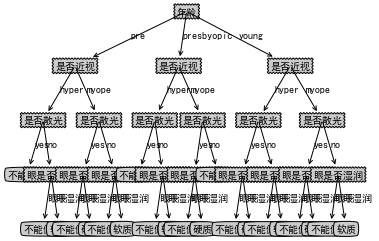

In [39]:
'''
预测患者需要佩戴隐形眼镜的类型
'''
# -*- coding:utf-8-*-
display(labels)
display(tree)
#storeTree(tree,"classifierStoreage.txt")
#getNumLeafs(tree)
#getTreeDepth(tree)
#createPlot(tree)
#display(labels)
#classify(tree,labels,[1,0])
#fr = open('../Ch03/lenses.txt')
#lenses = [line.strip().split("\t") for line in fr.readlines()]
#display(type(lenses).__name__)
leneseLabels= [U'年龄',U'是否近视',U'是否散光',U'眼是否湿润']
df = pd.read_table('../Ch03/lenses.txt',sep="\t",encoding='utf-8')
display(df.head(5))
tree = createTree(np.array(df).tolist(),leneseLabels)
createPlot(tree)


*医生最多需要问四个问题就可以知道患者带那种眼睛，如图：决策树非常好的匹配了试验数据，然而这些数据选项可能太多，我们成这种问题为过度匹配，为了减少过度匹配，我们需要进行裁枝*

,名字,体温,表皮覆盖,胎生,水生生物,飞行动物,有腿,冬眠,类标号
0,人类,恒温,毛发,是,否,否,是,否,哺乳类
1,蟒蛇,冷血,鳞片,否,否,否,否,是,爬行类
2,鲑鱼,冷血,鳞片,否,是,否,否,否,鱼类
3,鲸,恒温,毛发,是,是,否,否,否,哺乳类
4,青蛙,冷血,无,否,半,否,是,是,两栖类


u'\u722c\u884c\u7c7b'

0.2

u'\u9e1f\u7c7b'

0.13333333333333333

u'\u9c7c\u7c7b'

0.2

u'\u4e24\u6816\u7c7b'

0.13333333333333333

u'\u54fa\u4e73\u7c7b'

0.3333333333333333

u'\u9e1f\u7c7b'

0.2857142857142857

u'\u54fa\u4e73\u7c7b'

0.7142857142857143

u'\u722c\u884c\u7c7b'

0.375

u'\u9c7c\u7c7b'

0.375

u'\u4e24\u6816\u7c7b'

0.25

u'\u4e24\u6816\u7c7b'

1.0

u'\u54fa\u4e73\u7c7b'

1.0

u'\u9e1f\u7c7b'

1.0

u'\u54fa\u4e73\u7c7b'

1.0

u'\u54fa\u4e73\u7c7b'

1.0

u'\u722c\u884c\u7c7b'

0.5

u'\u9c7c\u7c7b'

0.5

u'\u9c7c\u7c7b'

0.16666666666666666

u'\u54fa\u4e73\u7c7b'

0.8333333333333334

u'\u722c\u884c\u7c7b'

0.3333333333333333

u'\u9e1f\u7c7b'

0.2222222222222222

u'\u9c7c\u7c7b'

0.2222222222222222

u'\u4e24\u6816\u7c7b'

0.2222222222222222

u'\u722c\u884c\u7c7b'

0.25

u'\u9e1f\u7c7b'

0.25

u'\u4e24\u6816\u7c7b'

0.5

u'\u9c7c\u7c7b'

0.75

u'\u54fa\u4e73\u7c7b'

0.25

u'\u722c\u884c\u7c7b'

0.2857142857142857

u'\u9e1f\u7c7b'

0.14285714285714285

u'\u54fa\u4e73\u7c7b'

0.5714285714285714

u'\u9e1f\u7c7b'

0.5

u'\u54fa\u4e73\u7c7b'

0.5

u'\u722c\u884c\u7c7b'

0.23076923076923078

u'\u9e1f\u7c7b'

0.07692307692307693

u'\u9c7c\u7c7b'

0.23076923076923078

u'\u4e24\u6816\u7c7b'

0.15384615384615385

u'\u54fa\u4e73\u7c7b'

0.3076923076923077

u'\u722c\u884c\u7c7b'

0.2

u'\u9e1f\u7c7b'

0.2

u'\u4e24\u6816\u7c7b'

0.2

u'\u54fa\u4e73\u7c7b'

0.4

u'\u722c\u884c\u7c7b'

0.2

u'\u9c7c\u7c7b'

0.6

u'\u54fa\u4e73\u7c7b'

0.2

u'\u722c\u884c\u7c7b'

0.3333333333333333

u'\u4e24\u6816\u7c7b'

0.3333333333333333

u'\u54fa\u4e73\u7c7b'

0.3333333333333333

u'\u722c\u884c\u7c7b'

0.1111111111111111

u'\u9e1f\u7c7b'

0.2222222222222222

u'\u9c7c\u7c7b'

0.3333333333333333

u'\u54fa\u4e73\u7c7b'

0.3333333333333333

u'\u722c\u884c\u7c7b'

0.5

u'\u9c7c\u7c7b'

0.5

u'\u722c\u884c\u7c7b'

0.5

u'\u9c7c\u7c7b'

0.5

u'\u9c7c\u7c7b'

1.0

u'\u722c\u884c\u7c7b'

0.6

u'\u9c7c\u7c7b'

0.4

u'\u722c\u884c\u7c7b'

1.0

u'\u9c7c\u7c7b'

1.0

u'\u722c\u884c\u7c7b'

1.0

u'\u722c\u884c\u7c7b'

0.5

u'\u9c7c\u7c7b'

0.5

u'\u722c\u884c\u7c7b'

1.0

u'\u722c\u884c\u7c7b'

0.25

u'\u9c7c\u7c7b'

0.75

u'\u722c\u884c\u7c7b'

1.0

u'\u722c\u884c\u7c7b'

0.25

u'\u9c7c\u7c7b'

0.75

u'\u8868\u76ae\u8986\u76d6'

u'\u6c34\u751f\u751f\u7269'

u'\u8868\u76ae\u8986\u76d6'

u'\u6c34\u751f\u751f\u7269'

u'\u6c34\u751f\u751f\u7269'

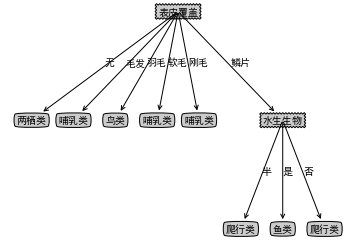

In [41]:
# -*- coding:utf-8-*-
test_df = pd.read_table('purudongwu.txt',sep="\t",encoding='utf-8')
display(test_df.head(5))
test_labels = [U'体温',U'表皮覆盖',U'胎生'
               ,U'水生生物',U'飞行动物',U'有腿',U'冬眠']
#display(np.delete(np.array(test_df),1,1))
test_tree = createTree(np.delete(np.array(test_df),0,1).tolist(),test_labels)
createPlot(test_tree)

**贝叶斯分类**
$$P(B_i\mid A) = \frac{P(A \mid B_i)}{全概率 =  \sum_{i=1}^n P(A \mid B_i)P(B_i)}$$
<p>
    **条件概率** <br>
    例：降一枚金币投掷两次，观察正反面，这A事件“至少有一次H”，事件B为“两次投掷同一面”现在求已知时间A发生下事件B发生的概率。
    针对投币有一个样本空间$S=\{HH,HT,TH,TT\} ,A=\{HH,HT,TH\}, B=\{HH,TT\}$易知此为古典型概率问题，已知事件A已发生，有了这一信息我们知道TT不可能发生，其中只有 HH属于B。于是在事件A中发生B的概率就记做$P(B \mid a)$为<br>
    $P(B \mid a) = \frac{1}{3}$<br>
    在这里我们看到$P(B)=\frac{2}{4} \neq P(B \mid a) $这很容易理解，因为我们在求B的时候是限制在A下面的。另外已知
    $$P(A) = \frac{3}{4} 、P(AB) = \frac{1}{4}、 P(B \mid a) = \frac{1}{3}=\frac{\frac{1}{4}}{\frac{3}{4}} $$<br>
    $$因此 P(B \mid A) = \frac{P(AB)}{P(A)} $$<br>
    <ol>
        <li>非负性:对于每一个事件B $P(B \mid A) \geq 0$</li>
        <li>规范性:对于必然时间S 有$P(S) =  1$ </li>
        <li>可列可加性:设$B_1、B_2、B_3、....$是两两互补相容事件则有 $P(\cup_{i=1}^n B\mid A) = \sum_{i=1}^nP(B \mid A)$</li>
    </ol>
    
</p>
**朴素贝叶斯分类**
$$P(B,A) = \frac{P(B) \overline{||}_{i=1}^n(P(A_i)P(B))}{P(A)}$$

In [12]:
'''
根据贝叶斯定理，需要计算多个概率的乘机，以获得的文档数据某个类别 
所以没个条件概率不能出现零数值，如果一个为零没个其结果也为零了，措施就是就是付初始值
没个词的概率为1/2
数值下溢问题，由于很多太少的数相乘，导致下益，造成结果不正确
（特别提出是在Python中在四舍五入得情况下就是0）解决途径就是自然对数。在代数中
ln(a*b)=ln(a)+ln(b),因此呢在处理这类问题时可以使用自然对数来避免四舍五入和下益问题
f(x)和ln(f(x))在同一定义域内具有相同的极值点和单调性，所以不会影响最终结果
'''

def trainNB(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory)/float(numTrainDocs)  #辱骂率
    #p0Num = np.zeros(numWords)
    #p1Num = np.zeros(numWords)
    p0Num = np.ones(numWords)
    p1Num = np.ones(numWords)
    p0Denom = 2.0
    p1Denom = 2.0 
    for i in range(numTrainDocs):
        if trainCategory[i] == 1: # 侮辱性质的类别
            p1Num += trainMatrix[i] # 向量相加
            p1Denom += np.sum(trainMatrix[i]) # 弟 i 文档有多少在档词语
            display(trainMatrix[i])
            display(np.sum(trainMatrix[i]))
        else:
            p0Num += trainMatrix[i] # 向量相加
            p0Denom += np.sum(trainMatrix[i]) # 弟 i 文档有多少在档词语
    p1Vect = np.log(p1Num/p1Denom) #在侮辱性文档中每个词的词频
    p0Vect = np.log(p0Num/p0Denom)  #在非侮辱性文档中每个词的词频
    
    return p0Vect,p1Vect,pAbusive
'''
分类函数
'''
def classifyNB(vect2Classify,p0V,p1V,pclass1):
    p1= sum(vect2Classify*p1V)+np.log(pclass1)
    p0 = sum(vect2Classify*p0V)+np.log(1.0-pclass1)
    #print "p1>",p1
    #print "p0>",p0
    if p1 > p0:
        return 1
    else:
        return 0
def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]
    return postingList,classVec
'''
提取向量集
'''
def createVocabList(dataSet):
    vocabSet =set([])
    for document in dataSet:
        vocabSet = vocabSet | set(document)
    #print vocabSet
    return list(vocabSet)
def setOfWords2Vec(vocabList,inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
                returnVec[vocabList.index(word)] =1
        else:
            print "the word: <%s> is not in my Vocabulary!"% word
    return returnVec
'''
生成文档的词频向量
'''
def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec
   
def testingNB():
    listOPosts,listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat=[]
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    p0V,p1V,pAb = trainNB(np.array(trainMat),np.array(listClasses))
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb)
    testEntry = ['stupid', 'garbage']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb)


In [13]:
testingNB()

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0])

8

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0])

5

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0])

6

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


In [27]:
'''
获取邮件信息过滤垃圾邮件
'''
def textParse(bigString):
    import re 
    listOfTokens = re.split(r'\W*',bigString)
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]
def spamTest():
    docList=[] #文档集
    classList = [] #类标号集
    fullText =[] #所有词集（并包含重复词）
    for i in range(1,26):
        wordList = textParse(open('../Ch04/email/spam/%d.txt' % i).read()) #垃圾邮件
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1)
        wordList = textParse(open('../Ch04/email/ham/%d.txt' % i).read())  #通过的费垃圾邮寄
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabList(docList)#创建词集（不重复）
    trainingSet = range(50); testSet=[]           #创建测试集
    for i in range(10):
        randIndex = int(random.uniform(0,len(trainingSet))) #生成[0,50)间的随机数
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])  
    trainMat=[]; trainClasses = []  #训练集
    for docIndex in trainingSet:#train the classifier (get probs) trainNB0
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))  #文档词频向量
        trainClasses.append(classList[docIndex])   #文档所属类别
    p0V,p1V,pSpam = trainNB(array(trainMat),array(trainClasses))
    errorCount = 0
    for docIndex in testSet:        #对每个文档集分类
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(array(wordVector),p0V,p1V,pSpam) != classList[docIndex]:
            errorCount += 1
            print "classification error",docList[docIndex]
    print 'the error rate is: ',float(errorCount)/len(testSet)


In [211]:
for i in range(500):
    spamTest()


the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
the error rate is:  0.0
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal', 'mathematics', 'and', 'advocate', 'more', 'sophisticated', 'modelling', 'quantitative', 'finance', 'died', '14th', 'october', '2010', 'aged', 'wilmott', 'magazine', 'has', 'often', 'featured', 'mandelbrot', 'his', 'ideas', 'and', 'the', 'work', 'others', 'inspired', 'his', 'fundamental', 'insights', 'you', 'must', 'logged', 'view', 'these', 'articles', 'from', 'past', 'issues', 'wilmott', 'magazine

the error rate is:  0.1
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['experience', 'with', 'biggerpenis', 'today', 'grow', 'inches', 'more', 'the', 'safest', 'most', 'effective', 'methods', 'of_penisen1argement', 'save', 'your', 'time', 'and', 'money', 'bettererections', 'with', 'effective', 'ma1eenhancement', 'products', 'ma1eenhancement', 'supplement', 'trusted', 'millions', 'buy', 'today']
the error rate is:  0.2
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn',

classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
the error rate is:  0.2
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
classification error ['yea

classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal', 'mathematics', 'and', 'advocate', 'more', 'sophisticated', 'modelling', 'quantitative', 'finance', 'died', '14th', 'october', '2010', 'aged', 'wilmott', 'magazine', 'has', 'often', 'featured', 'mandelbrot', 'his', 'ideas', 'and', 'the', 'work', 'others', 'inspired', 'his', 'fundamental', 'insights', 'you', 'must', 'logged', 'view', 'these', 'articles', 'from', 'past', 'issues', 'wilmott', 'magazine']
the error rate is:  0.1
the error rate is:  0.0
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'u

the error rate is:  0.1
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
classification error ['ryan', 'whybrew', 'commented', 'your', 'status', 'ryan', 'wrote', 'turd', 'ferguson', 'butt', 'horn']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder',

the error rate is:  0.0
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu

classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
the error rate is:  0.0
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
the error rate is:  0.1
classification error ['linkedin', 'kerry', 'haloney', 'requested', 'add', 'you', 'connection', 'linkedin', 'peter', 'like', 'add', 'you', 'professional', 'network', 'linkedin', 'kerry', 'haloney']
the error rate is:  0.1
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar',

classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
the error rate is:  0.1
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
classification error ['ben

classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
the error rate is:  0.0
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
the error rate is:  0.1
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal', 'mathematics', 'and', 'advocate', 'more', 'sophisticated', 'modelling', 'quantitative', 'finance', 'died', '14th', 'october', '2010', 'aged', 'wilmott', 'magazine', 'has', 'often', 'featured', 'mandelbrot', 'his', 'ideas', 'and', 'the', 'work', 'others', 'inspired', 'his', 'fundamental', 'insights', 'you', 'must', 'logg

the error rate is:  0.0
the error rate is:  0.0
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
the error rate is:  0.0
classification error ['scifinance', 'now', 'a

the error rate is:  0.1
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and

classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
the error rate is:  0.0
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.1
the error rate is:  0.0
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
the error rate is:  0.1
classification error ['buyviagra', '25mg', '50mg', '100mg', 'brandviagra', 'femaleviagra', 'from', 'per', 'pill', 'viagr

the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'exp

the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'windows', 'ultimate', '119', 'adobe', 'photoshop', 'cs5', 'extended', 'adobe', 'acrobat', 'pro', 'extended', 'windows', 'professional', 'thousand', 'more', 'titles']
the error rate is:  0.1
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
the error rate is:  0

classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
the error rate is:  0.1
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
the error rate is:  0.0
classification error ['home', 'based', 'business', 'opportunity', 'knocking', 'your', 'door', 'don', 'rude', 'and', 'let', 'this', 'chance', 'you', 'can', 'earn', 'great', 'income', 'and', 'find', 'your', 'financial', 'life', 'transformed', 'learn', 'more', 'here', 'your', 'success', 'work', 'from', 'home', 'finder', 'experts']
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal',

classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
the error rate is:  0.2
classification error ['benoit', 'mandelbrot', '1924', '2010', 'benoit', 'mandelbrot', '1924', '2010', 'wilmott', 'team', 'benoit', 'mandelbrot', 'the', 'mathematician', 'the', 'father', 'fractal', 'mathematics', 'and', 'advocate', 'more', 'sophisticated', 'modelling', 'quantitative', 'finance', 'died', '14th', 'october', '2010', 'aged', 'wilmott', 'magazine', 'has', 'often', 'featured', 'mandelbrot', 'his', 

classification error ['scifinance', 'now', 'automatically', 'generates', 'gpu', 'enabled', 'pricing', 'risk', 'model', 'source', 'code', 'that', 'runs', '300x', 'faster', 'than', 'serial', 'code', 'using', 'new', 'nvidia', 'fermi', 'class', 'tesla', 'series', 'gpu', 'scifinance', 'derivatives', 'pricing', 'and', 'risk', 'model', 'development', 'tool', 'that', 'automatically', 'generates', 'and', 'gpu', 'enabled', 'source', 'code', 'from', 'concise', 'high', 'level', 'model', 'specifications', 'parallel', 'computing', 'cuda', 'programming', 'expertise', 'required', 'scifinance', 'automatic', 'gpu', 'enabled', 'monte', 'carlo', 'pricing', 'model', 'source', 'code', 'generation', 'capabilities', 'have', 'been', 'significantly', 'extended', 'the', 'latest', 'release', 'this', 'includes']
the error rate is:  0.1


In [37]:
'''
使用朴素贝叶斯分类器从个人广告中获取区域倾向
'''
import feedparser
ny = feedparser.parse("http://newyork.craigslist.org/stp/index.rss")
sf = feedparser.parse("http://sfbay.craigslist.org/stp/index.rss")
display(np)
display(sf)
'''
计算词频
'''
def calcMostFreq(vocabList,fullText):
    import operator
    freqDict = {}
    for token in vocabList:
        freqDict[token]=fullText.count(token)
    sortedFreq = sorted(freqDict.iteritems(), key=operator.itemgetter(1), reverse=True) 
    return sortedFreq[:30]       

def localWords(feed1,feed0):
    import feedparser
    docList=[]; classList = []; fullText =[]
    minLen = min(len(feed1['entries']),len(feed0['entries']))
    for i in range(minLen):
        wordList = textParse(feed1['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1) #NY is class 1
        wordList = textParse(feed0['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabList(docList)#create vocabulary
    top30Words = calcMostFreq(vocabList,fullText)   #remove top 30 words
    for pairW in top30Words:
        if pairW[0] in vocabList: vocabList.remove(pairW[0])
    trainingSet = range(2*minLen); testSet=[]           #create test set
    for i in range(20):
        randIndex = int(np.random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])  
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:#train the classifier (get probs) trainNB0
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam = trainNB(np.array(trainMat),np.array(trainClasses))
    errorCount = 0
    for docIndex in testSet:        #classify the remaining items
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(np.array(wordVector),p0V,p1V,pSpam) != classList[docIndex]:
            errorCount += 1
    print 'the error rate is: ',float(errorCount)/len(testSet)
    return vocabList,p0V,p1V

def getTopWords(ny,sf):
    import operator
    vocabList,p0V,p1V=localWords(ny,sf)
    topNY=[]; topSF=[]
    for i in range(len(p0V)):
        if p0V[i] > -6.0 : topSF.append((vocabList[i],p0V[i]))
        if p1V[i] > -6.0 : topNY.append((vocabList[i],p1V[i]))
    sortedSF = sorted(topSF, key=lambda pair: pair[1], reverse=True)
    print "SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**"
    for item in sortedSF:
        print item[0]
    sortedNY = sorted(topNY, key=lambda pair: pair[1], reverse=True)
    print "NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**NY**"
    for item in sortedNY:
        print item[0]

<module 'numpy' from 'c:\programdata\anaconda3\envs\py2.7\lib\site-packages\numpy\__init__.pyc'>

{'bozo': 0,
 'encoding': u'utf-8',
 'entries': [{'dc_source': u'https://sfbay.craigslist.org/sfc/stp/d/staying-at-grand-wailea-maui/6362392714.html',
   'dc_type': u'text',
   'enc_enclosure': {'resource': u'https://images.craigslist.org/00s0s_iN6svFZNi9j_300x300.jpg',
    'type': u'image/jpeg'},
   'id': u'https://sfbay.craigslist.org/sfc/stp/d/staying-at-grand-wailea-maui/6362392714.html',
   'language': u'en-us',
   'link': u'https://sfbay.craigslist.org/sfc/stp/d/staying-at-grand-wailea-maui/6362392714.html',
   'links': [{'href': u'https://sfbay.craigslist.org/sfc/stp/d/staying-at-grand-wailea-maui/6362392714.html',
     'rel': u'alternate',
     'type': u'text/html'}],
   'published': u'2017-10-29T07:15:06-07:00',
   'published_parsed': time.struct_time(tm_year=2017, tm_mon=10, tm_mday=29, tm_hour=14, tm_min=15, tm_sec=6, tm_wday=6, tm_yday=302, tm_isdst=0),
   'rights': u'copyright 2017 craiglist',
   'rights_detail': {'base': u'https://sfbay.craigslist.org/search/stp?format=rss

In [38]:
localWords(ny,sf)

the error rate is:  0.15


([u'all',
  u'people',
  u'hanging',
  u'situati',
  u'apartment',
  u'young',
  u'send',
  u'masculine',
  u'friendly',
  u'activities',
  u'very',
  u'fat',
  u'minded',
  u'cool',
  u'skills',
  u'joined',
  u'sane',
  u'enjoy',
  u'lecturing',
  u'sigh',
  u'boots',
  u'street',
  u'casual',
  u'depression',
  u'drinks',
  u'39yo',
  u'what',
  u'giving',
  u'section',
  u'current',
  u'new',
  u'body',
  u'outgoing',
  u'desires',
  u'never',
  u'here',
  u'hours',
  u'explore',
  u'others',
  u'active',
  u'sexy',
  u'100',
  u'beca',
  u'change',
  u'fantasies',
  u'great',
  u'healthy',
  u'fwb',
  u'pics',
  u'adjectives',
  u'weekday',
  u'smoke',
  u'social',
  u'usually',
  u'makes',
  u'massage',
  u'thats',
  u'love',
  u'manage',
  u'pantyhose',
  u'from',
  u'takes',
  u'fem',
  u'sports',
  u'cherished',
  u'music',
  u'wondering',
  u'oils',
  u'type',
  u'tell',
  u'today',
  u'more',
  u'sort',
  u'knows',
  u'relax',
  u'started',
  u'share',
  u'company',
  u'down

In [39]:
getTopWords(ny,sf)

the error rate is:  0.5
SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**SF**
nice
from
male
things
chat
going
else
lady
home
time
friendly
enjoy
new
downtown
movies
want
over
coffee
bashful
day
our
open
city
too
feeling
need
also
close
email
recently
job
much
those
hang
student
person
lets
discreet
some
anything
area
there
avail
lonely
bored
single
welcome
age
hello
situati
activities
fat
joined
lecturing
street
drinks
what
giving
section
others
change
pics
adjectives
social
thats
love
takes
cherished
music
wondering
type
more
started
phone
women
valued
work
can
meet
process
laughs
stroke
preferably
till
intelligent
140
lay
ethnic
guys
man
cannot
boyfri
comfort
office
mainly
through
looks
edging
lunch
nov
hearing
term
ooking
each
everyone
primarily
doing
year
bay
special
really
hangouts
cart
ask
care
grad
conversation
platonic
feel
ons
least
anyone
exploring
relationship
part
gotten
matter
iron
say
buy
nights
self
responsible
without
build
wanting
latino
nothing
why
don
med